In [1]:
'''
import math
from pathlib import Path
import os
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
mesh = 100
def load_data(filepath = "..\\data\\raw\\training\\fd=0.3-0.7_discs", total_image_count=None):
    def load_class_data(filepath, classname):
        paths = list(Path(filepath).rglob('2dft.dat'))
        path_len = len(list(paths))
        if (path_len == 0):
            return [], []
        rows_to_read = None
        if (total_image_count is not None):
            file_count = path_len
            rows_to_read = math.floor(total_image_count/file_count) * mesh * mesh
        x = np.empty((0, mesh, mesh, 1)); y = np.empty((1))
        for path in paths:
            print("Start Loading Data")
            loaded_data = pd.read_csv(path, header=None, 
                                         sep='\s+',
                                         nrows=rows_to_read).to_numpy()
            print("Loaded Data")
            loaded_data = loaded_data[:loaded_data.size - (loaded_data.size % (mesh * mesh))].reshape(-1, mesh, mesh, 1)
            x = np.append(x, loaded_data, axis=0)
            y = np.append(y, np.full(int(loaded_data.shape[0]/(mesh*mesh)), classname))
        return x, y
    disc_data = load_class_data(os.path.join(filepath, 'disc'), 'ES')
    no_disc_data = load_class_data(os.path.join(filepath, 'no_disc'), 'E')
    unknown_data = load_class_data(os.path.join(filepath, 'unknown'), '?')
    return disc_data, no_disc_data, unknown_data
'''

'\nimport math\nfrom pathlib import Path\nimport os\nimport numpy as np\nimport pandas as pd\nfrom joblib import Parallel, delayed\nmesh = 100\ndef load_data(filepath = "..\\data\\raw\\training\\fd=0.3-0.7_discs", total_image_count=None):\n    def load_class_data(filepath, classname):\n        paths = list(Path(filepath).rglob(\'2dft.dat\'))\n        path_len = len(list(paths))\n        if (path_len == 0):\n            return [], []\n        rows_to_read = None\n        if (total_image_count is not None):\n            file_count = path_len\n            rows_to_read = math.floor(total_image_count/file_count) * mesh * mesh\n        x = np.empty((0, mesh, mesh, 1)); y = np.empty((1))\n        for path in paths:\n            print("Start Loading Data")\n            loaded_data = pd.read_csv(path, header=None, \n                                         sep=\'\\s+\',\n                                         nrows=rows_to_read).to_numpy()\n            print("Loaded Data")\n            loaded

In [1]:
import math
from pathlib import Path
import os
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
mesh = 100
def load_data_into_fits(filepath = "..\\data\\raw\\training\\fd=0.2-0.8_discs", total_image_count=None):
    def load_data_chunk(path, rows_to_read, classname):
            loaded_data = pd.read_csv(path, header=None, 
                                         sep='\s+',
                                         nrows=rows_to_read).to_numpy()
            loaded_data = loaded_data[:loaded_data.size - (loaded_data.size % (mesh * mesh))].reshape(-1, mesh, mesh)
            y = np.full(int(loaded_data.shape[0]), classname)
            return loaded_data, y
    def load_class_data(filepath, classname):
        paths = list(Path(filepath).rglob('2dft.dat'))
        path_len = len(list(paths))
        if (path_len == 0):
            return None
        rows_to_read = None
        if (total_image_count is not None):
            file_count = path_len
            rows_to_read = math.floor(total_image_count/file_count) * mesh * mesh

        output = Parallel(n_jobs=path_len)(delayed(load_data_chunk)(path, rows_to_read, classname) for path in paths)
        return output
    def save_to_fits(new_hdul, data):
        
        for part in data:
            #print(np.max(part[0]))
            new_hdul.append(fits.CompImageHDU(part[0]))
            class_data = Table.from_pandas(pd.DataFrame(part[1], columns=["class"]))
            new_hdul.append(fits.table_to_hdu(class_data))
        
    disc_data = load_class_data(os.path.join(filepath, 'disc'), 'ES')
    no_disc_data = load_class_data(os.path.join(filepath, 'no_disc'), 'E')
    unknown_data = load_class_data(os.path.join(filepath, 'unknown'), '?')
    new_hdul = fits.HDUList()
    if (disc_data is not None):
        save_to_fits(new_hdul, disc_data)
        
    if (no_disc_data is not None):    
        save_to_fits(new_hdul, no_disc_data)

    if (unknown_data is not None):
        save_to_fits(new_hdul, unknown_data)
        
    new_hdul.writeto("..\\data\\fits_training\\fd=0.2-0.8.fits", overwrite = True)
    return disc_data, no_disc_data, unknown_data

In [3]:
def raw_to_fits(filepath = "..\\data\\raw\\testing\\nair_abraham_2010", name="nair_abraham_2010.fits"):
    from astropy.io import fits
    from astropy.table import Table
    from matplotlib import pyplot as plt
    image_data, Y = load_dataset(filepath)
    plt.imshow(image_data[0])

    class_data = Table.from_pandas(pd.DataFrame(Y, columns=["class"]))
    primary_hdu = fits.PrimaryHDU(image_data)
    table_hdu = fits.table_to_hdu(class_data)
    hdul = fits.HDUList([primary_hdu, table_hdu])
    hdul.writeto(name, overwrite=True)
    
    with fits.open(name) as hdul:
        img_arr = np.array(hdul[0].data)
        img_class = hdul[1].data

    from matplotlib import pyplot as plt
    plt.imshow(img_arr[0])

In [2]:
disc_data, no_disc_data, unknown_data = load_data_into_fits()

(1000, 100, 100)


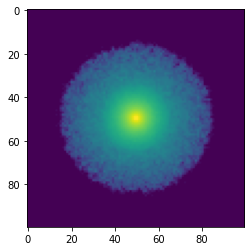

In [5]:
print(disc_data[0][0].shape)
plt.imshow(disc_data[26][0][0])

In [ ]:
%run ../utility/data_loading.ipynb
x, Y, metadata = load_data_new()

In [ ]:
x.shape

In [ ]:
print(np.max(x))